time for random hill climbing : 0.01655204999997295
time for simulated annealing : 0.020888119000119332
time for genetic algorithm : 3.4928135420000217
time for mimic : 783.3321457119998
random_hill_climbing =  (array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]), 0.0, array([[  0.,   1.],
       [  0.,   2.],
       [  0.,   3.],
       [  0.,   4.],
       [  0.,   5.],
       [  0.,   6.],
       [  0.,   7.],
       [  0.,   8.],
       [  0.,   9.],
       [  0.,  10.],
       [  0.,  11.],
       [  0.,  12.],
       [  0.,  13.],
       [  0.,  14.],
       [  0.,  15.],
       [  0.,  16.],
       [  0.,  17.],
       [  0.,  18.],
       [  0.,  19.],
       [  0.,  20.],
       [  0.,  21.],
     

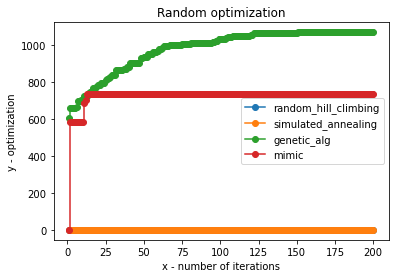

In [4]:
# All algorithms

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random

# length (int) – Number of elements in state vector.
length = 100
# Maximum number of iterations of the algorithm
max_iters = 200
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = max_iters

weights = [random.randint(1,20) for i in range(length)]
values = [random.randint(1,30) for i in range(length)]

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.Knapsack(weights, values, max_weight_pct=0.35)

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

time1 = time.perf_counter()
random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=0,
                      init_state=None, curve=True, random_state=1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for random hill climbing :', timeA)

simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=max_attempts,
                        max_iters=max_iters, init_state=None, curve=True,
                        random_state=1)

time3 = time.perf_counter()
timeB = time3 - time2
print('time for simulated annealing :', timeB)

genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=max_attempts,
                max_iters=max_iters, curve=True, random_state=1)

time4 = time.perf_counter()
timeC = time4 - time3
print('time for genetic algorithm :', timeC)

mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=max_attempts,
          max_iters=max_iters, curve=True, random_state=1)

time5 = time.perf_counter()
timeD = time5 - time4
print('time for mimic :', timeD)

print('random_hill_climbing = ',random_hill_climbing)
print('simulated_annealing = ', simulated_annealing)
print('genetic_alg = ',genetic_alg)
print('mimic = ',mimic)


iterations = np.linspace(1,max_iters,max_iters,dtype="int")
y_random_hill_climbing = [random_hill_climbing[2][i][0] for i in range(max_iters)]
y_simulated_annealing = [simulated_annealing[2][i][0] for i in range(max_iters)]
y_genetic_alg = [genetic_alg[2][i][0] for i in range(max_iters)]
y_mimic = [mimic[2][i][0] for i in range(max_iters)]


# plotting the graph

fig, ax = plt.subplots()
ax.plot(iterations , y_random_hill_climbing , marker="o", label="random_hill_climbing",drawstyle="steps-post")
ax.plot(iterations , y_simulated_annealing ,marker="o",label="simulated_annealing",drawstyle="steps-post")
ax.plot(iterations , y_genetic_alg ,marker="o",label="genetic_alg",drawstyle="steps-post")
ax.plot(iterations , y_mimic ,marker="o", label="mimic",drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Random optimization')
ax.legend()
plt.show()

time for random hill climbing : 0.023572768001031363
time for simulated annealing : 0.5325727409999672
time for genetic algorithm : 7.534445149000021
time for mimic : 5556.881731276
random_hill_climbing =  (array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0]), 0.0, array([[  0.,   1.],
       [  0.,   2.],
       [  0.,   3.],
       [  0.,   4.],
       [  0.,   5.],
       [  0

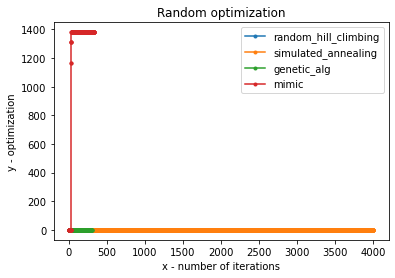

In [16]:
# All algorithms with max attemps different than max iters.

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random

# length (int) – Number of elements in state vector.
length = 200
# Maximum number of iterations of the algorithm
max_iters = 4000
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = 300

weights = [random.randint(1,20) for i in range(length)]
values = [random.randint(1,30) for i in range(length)]

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.Knapsack(weights, values, max_weight_pct=0.35)

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

time1 = time.perf_counter()
random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=0,
                      init_state=None, curve=True, random_state=1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for random hill climbing :', timeA)

simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=max_attempts,
                        max_iters=max_iters, init_state=None, curve=True,
                        random_state=1)

time3 = time.perf_counter()
timeB = time3 - time2
print('time for simulated annealing :', timeB)

genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=max_attempts,
                max_iters=max_iters, curve=True, random_state=1)

time4 = time.perf_counter()
timeC = time4 - time3
print('time for genetic algorithm :', timeC)

mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=max_attempts,
          max_iters=max_iters, curve=True, random_state=1)

time5 = time.perf_counter()
timeD = time5 - time4
print('time for mimic :', timeD)

print('random_hill_climbing = ',random_hill_climbing)
print('simulated_annealing = ', simulated_annealing)
print('genetic_alg = ',genetic_alg)
print('mimic = ',mimic)

iterations = np.linspace(1,max_iters,max_iters,dtype="int")
y_random_hill_climbing = [random_hill_climbing[2][i][0] for i in range(len(random_hill_climbing[2]))]
y_simulated_annealing = [simulated_annealing[2][i][0] for i in range(len(simulated_annealing[2]))]
y_genetic_alg = [genetic_alg[2][i][0] for i in range(len(genetic_alg[2]))]
y_mimic = [mimic[2][i][0] for i in range(len(mimic[2]))]

iterations_rhc = np.linspace(1,len(random_hill_climbing[2]),len(random_hill_climbing[2]),dtype="int")
iterations_sa = np.linspace(1,len(simulated_annealing[2]),len(simulated_annealing[2]),dtype="int")
iterations_ga = np.linspace(1,len(genetic_alg[2]),len(genetic_alg[2]),dtype="int")
iterations_m = np.linspace(1,len(mimic[2]),len(mimic[2]),dtype="int")


# plotting the graph

fig, ax = plt.subplots()
ax.plot(iterations_rhc , y_random_hill_climbing , marker=".", label="random_hill_climbing",drawstyle="steps-post")
ax.plot(iterations_sa , y_simulated_annealing ,marker=".",label="simulated_annealing",drawstyle="steps-post")
ax.plot(iterations_ga , y_genetic_alg ,marker=".",label="genetic_alg",drawstyle="steps-post")
ax.plot(iterations_m , y_mimic ,marker=".", label="mimic",drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Random optimization')
ax.legend()
plt.show()

time for random hill climbing : 5.03561930199794
time for simulated annealing : 6.307102546001261
random_hill_climbing =  (array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]), 0.0, array([[0.0000e+00, 1.0000e+00],
       [0.0000e+00, 2.0000e+00],
       [0.0000e+00, 3.0000e+00],
       ...,
       [0.0000e+00, 9.9998e+04],
       [0.0000e+00, 9.9999e+04],
       [0.0000e+00, 1.0000e+05]]))
simulated_annealing =  (array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       

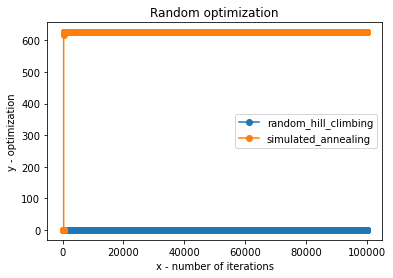

In [23]:
# RHC and SA

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random

# length (int) – Number of elements in state vector.
length = 100
# Maximum number of iterations of the algorithm
max_iters = 100000
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = max_iters

weights = [random.randint(1,20) for i in range(length)]
values = [random.randint(1,30) for i in range(length)]

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.Knapsack(weights, values, max_weight_pct=0.35)

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

time1 = time.perf_counter()
random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=0,
                      init_state=None, curve=True, random_state=1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for random hill climbing :', timeA)

simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=max_attempts,
                        max_iters=max_iters, init_state=None, curve=True,
                        random_state=1)

time3 = time.perf_counter()
timeB = time3 - time2
print('time for simulated annealing :', timeB)


print('random_hill_climbing = ',random_hill_climbing)
print('simulated_annealing = ', simulated_annealing)


iterations_rhc = np.linspace(1,len(random_hill_climbing[2]),len(random_hill_climbing[2]),dtype="int")
iterations_sa = np.linspace(1,len(simulated_annealing[2]),len(simulated_annealing[2]),dtype="int")
y_random_hill_climbing = [random_hill_climbing[2][i][0] for i in range(len(random_hill_climbing[2]))]
y_simulated_annealing = [simulated_annealing[2][i][0] for i in range(len(simulated_annealing[2]))]


# plotting the graph

fig, ax = plt.subplots()
ax.plot(iterations_rhc , y_random_hill_climbing , marker="o", label="random_hill_climbing",drawstyle="steps-post")
ax.plot(iterations_sa , y_simulated_annealing ,marker="o",label="simulated_annealing",drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Random optimization')
ax.legend()
plt.show()

time for genetic algorithm : 198.39170028899753
genetic_alg =  (array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]), 1011.0, array([[6.080000e+02, 4.020000e+02],
       [6.160000e+02, 6.040000e+02],
       [6.180000e+02, 8.060000e+02],
       ...,
       [1.011000e+03, 2.009847e+06],
       [1.011000e+03, 2.010048e+06],
       [1.011000e+03, 2.010249e+06]]))


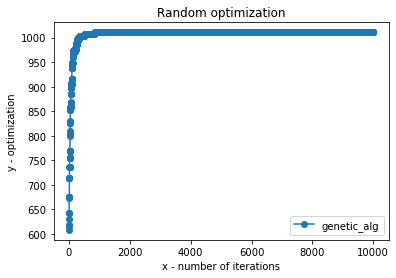

In [25]:
# GA alone

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random

# length (int) – Number of elements in state vector.
length = 100
# Maximum number of iterations of the algorithm
max_iters = 10000
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = max_iters

weights = [random.randint(1,20) for i in range(length)]
values = [random.randint(1,30) for i in range(length)]

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.Knapsack(weights, values, max_weight_pct=0.35)

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

time3 = time.perf_counter()

genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=max_attempts,
                max_iters=max_iters, curve=True, random_state=1)

time4 = time.perf_counter()
timeC = time4 - time3
print('time for genetic algorithm :', timeC)

print('genetic_alg = ',genetic_alg)


iterations = np.linspace(1,max_iters,max_iters,dtype="int")
y_genetic_alg = [genetic_alg[2][i][0] for i in range(max_iters)]

# plotting the graph

fig, ax = plt.subplots()
ax.plot(iterations , y_genetic_alg ,marker="o",label="genetic_alg",drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Random optimization')
ax.legend()
plt.show()

time for random hill climbing : 0.5307562320012948
time for simulated annealing : 0.6460412849992281
time for genetic algorithm : 196.45903741300208
random_hill_climbing =  (array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]), 0.0, array([[0.000e+00, 1.000e+00],
       [0.000e+00, 2.000e+00],
       [0.000e+00, 3.000e+00],
       ...,
       [0.000e+00, 9.998e+03],
       [0.000e+00, 9.999e+03],
       [0.000e+00, 1.000e+04]]))
simulated_annealing =  (array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0

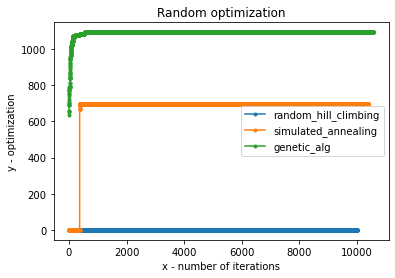

In [24]:
# RHC , SA and GA with max attemps different than max iters.

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random

# length (int) – Number of elements in state vector.
length = 100
# Maximum number of iterations of the algorithm
max_iters = 100000
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = 10000

weights = [random.randint(1,20) for i in range(length)]
values = [random.randint(1,30) for i in range(length)]

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.Knapsack(weights, values, max_weight_pct=0.35)

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

time1 = time.perf_counter()
random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=0,
                      init_state=None, curve=True, random_state=1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for random hill climbing :', timeA)

simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=max_attempts,
                        max_iters=max_iters, init_state=None, curve=True,
                        random_state=1)

time3 = time.perf_counter()
timeB = time3 - time2
print('time for simulated annealing :', timeB)

genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=max_attempts,
                max_iters=max_iters, curve=True, random_state=1)

time4 = time.perf_counter()
timeC = time4 - time3
print('time for genetic algorithm :', timeC)

print('random_hill_climbing = ',random_hill_climbing)
print('simulated_annealing = ', simulated_annealing)
print('genetic_alg = ',genetic_alg)

iterations = np.linspace(1,max_iters,max_iters,dtype="int")
y_random_hill_climbing = [random_hill_climbing[2][i][0] for i in range(len(random_hill_climbing[2]))]
y_simulated_annealing = [simulated_annealing[2][i][0] for i in range(len(simulated_annealing[2]))]
y_genetic_alg = [genetic_alg[2][i][0] for i in range(len(genetic_alg[2]))]

iterations_rhc = np.linspace(1,len(random_hill_climbing[2]),len(random_hill_climbing[2]),dtype="int")
iterations_sa = np.linspace(1,len(simulated_annealing[2]),len(simulated_annealing[2]),dtype="int")
iterations_ga = np.linspace(1,len(genetic_alg[2]),len(genetic_alg[2]),dtype="int")


# plotting the graph

fig, ax = plt.subplots()
ax.plot(iterations_rhc , y_random_hill_climbing , marker=".", label="random_hill_climbing",drawstyle="steps-post")
ax.plot(iterations_sa , y_simulated_annealing ,marker=".",label="simulated_annealing",drawstyle="steps-post")
ax.plot(iterations_ga , y_genetic_alg ,marker=".",label="genetic_alg",drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Random optimization')
ax.legend()
plt.show()

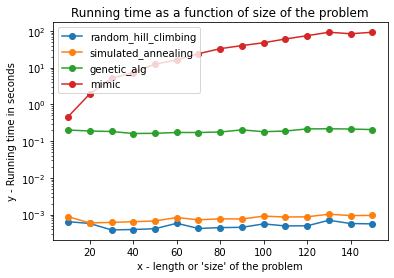

In [26]:
# implementation time
import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt

time_random_hill_climbing = []
time_simulated_annealing = []
time_genetic_alg = []
time_mimic = []

for k in range(10,160,10):
    # length (int) – Number of elements in state vector.
    length = k
    weights = [random.randint(1,20) for i in range(length)]
    values = [random.randint(1,30) for i in range(length)]

    # fitness_fn (fitness function object) – Object to implement fitness function for optimization.
    fitness_fn = mlrose_hiive.Knapsack(weights, values, max_weight_pct=0.35)

    problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)
    
    # Maximum number of iterations of the algorithm
    max_iters = 10

    # Maximum number of attempts to find a better neighbor at each step.
    max_attempts = max_iters

    time1 = time.perf_counter()
    random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=0,
                      init_state=None, curve=True, random_state=None)

    time2 = time.perf_counter()
    timeA = time2 - time1
    time_random_hill_climbing.append(timeA)

    simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=max_attempts,
                        max_iters=max_iters, init_state=None, curve=True,
                        random_state=None)

    time3 = time.perf_counter()
    timeB = time3 - time2
    time_simulated_annealing.append(timeB)

    genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=max_attempts,
                max_iters=max_iters, curve=True, random_state=1)

    time4 = time.perf_counter()
    timeC = time4 - time3
    time_genetic_alg.append(timeC)

    mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=max_attempts,
          max_iters=max_iters, curve=True, random_state=1)

    time5 = time.perf_counter()
    timeD = time5 - time4
    time_mimic.append(timeD)



# plotting the graph
iterations = np.linspace(10,150,15,dtype="int")

fig, ax = plt.subplots()
ax.plot(iterations , time_random_hill_climbing , marker="o", label="random_hill_climbing")
ax.plot(iterations , time_simulated_annealing ,marker="o",label="simulated_annealing")
ax.plot(iterations , time_genetic_alg ,marker="o",label="genetic_alg")
ax.plot(iterations , time_mimic ,marker="o", label="mimic")
ax.set_xlabel("x - length or 'size' of the problem")
ax.set_ylabel("y - Running time in seconds")
ax.set_yscale("log")
ax.set_title("Running time as a function of size of the problem")
ax.legend()
plt.show()



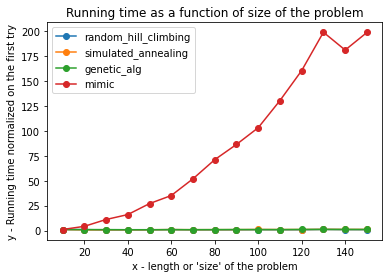

In [27]:
# implementation time with normal scale

time_random_hill_climbing_normalized = [time_random_hill_climbing[i]/time_random_hill_climbing[0] for i in range(len(time_random_hill_climbing))]
time_simulated_annealing_normalized = [time_simulated_annealing[i]/time_simulated_annealing[0] for i in range(len(time_simulated_annealing))]
time_genetic_alg_normalized = [time_genetic_alg[i]/time_genetic_alg[0] for i in range(len(time_genetic_alg))]
time_mimic_normalized = [time_mimic[i]/time_mimic[0] for i in range(len(time_mimic))]

# plotting the graph
iterations = np.linspace(10,150,15,dtype="int")

fig, ax = plt.subplots()
ax.plot(iterations , time_random_hill_climbing_normalized , marker="o", label="random_hill_climbing")
ax.plot(iterations , time_simulated_annealing_normalized ,marker="o",label="simulated_annealing")
ax.plot(iterations , time_genetic_alg_normalized ,marker="o",label="genetic_alg")
ax.plot(iterations , time_mimic_normalized ,marker="o", label="mimic")
ax.set_xlabel("x - length or 'size' of the problem")
ax.set_ylabel("y - Running time normalized on the first try")
ax.set_title("Running time as a function of size of the problem")
ax.legend()
plt.show()